In [3]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np

In [4]:
# Show DataFrame info.
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

tips=pd.read_excel('marketing_customer_analysis.xlsx', index_col=0) 
display(tips.head())

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# Describe DataFrame.

tips.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
tips.nunique()

State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [7]:
data=tips.drop(['State', 'Customer Lifetime Value', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type',
       'Vehicle Class','Vehicle Size'], axis=1)

In [8]:
data

,Response,Income,Sales Channel,Total Claim Amount
Customer,,,,
BU79786,No,56274,Agent,384.811147
QZ44356,No,0,Agent,1131.464935
AI49188,No,48767,Agent,566.472247
WW63253,No,0,Call Center,529.881344
HB64268,No,43836,Agent,138.130879
...,...,...,...,...
LA72316,No,71941,Web,198.234764
PK87824,Yes,21604,Branch,379.200000
TD14365,No,0,Branch,790.784983


<AxesSubplot:>

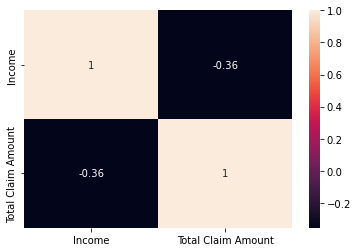

In [9]:
corelation=data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns ,annot=True)

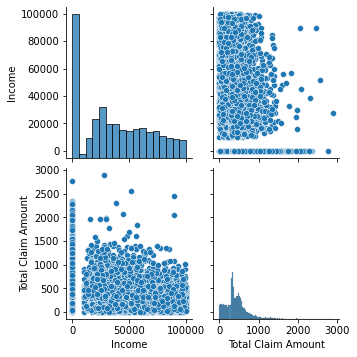

In [10]:
sns.pairplot(data)

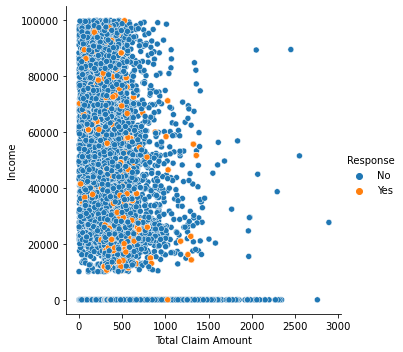

In [11]:
sns.relplot(x='Total Claim Amount', y='Income', hue='Response',  data=data)

In [12]:
print(data.loc[:,'Response'])

Customer
BU79786     No
QZ44356     No
AI49188     No
WW63253     No
HB64268     No
          ... 
LA72316     No
PK87824    Yes
TD14365     No
UP19263     No
Y167826     No
Name: Response, Length: 9134, dtype: object


<AxesSubplot:>

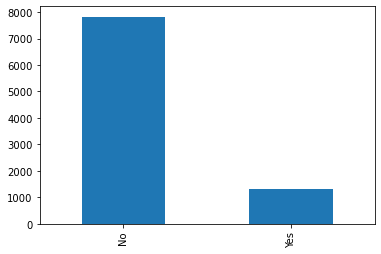

In [13]:
# Show a plot of the total number of responses.

data['Response'].value_counts().plot(kind='bar')

<AxesSubplot:>

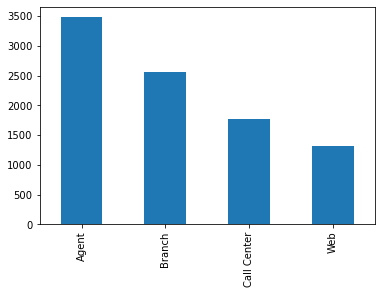

In [14]:
# Show a plot of the response rate by the sales channel.

data['Sales Channel'].value_counts().plot(kind='bar')

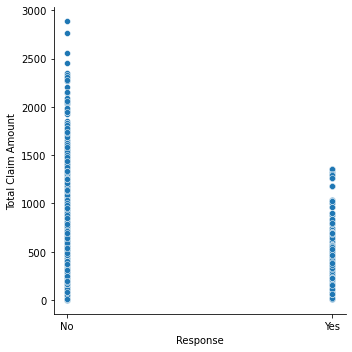

In [15]:
# Show a plot of the response rate by the total claim amount.

sns.relplot(x='Response', y='Total Claim Amount', data=data)

C:\Users\Elohome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


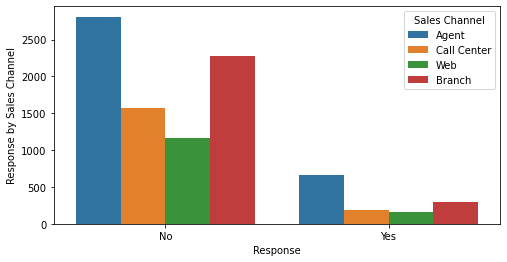

In [16]:
plt.figure(figsize=(8,4))
sns.countplot('Response', hue='Sales Channel', data=data)
plt.ylabel('Response by Sales Channel')
plt.show()

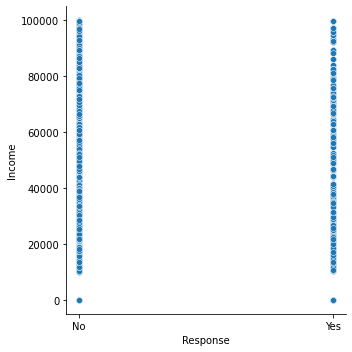

In [17]:
# Show a plot of the response rate by income.
sns.relplot(x='Response', y='Income', data=data)

In [18]:
# Customer Analysis 4

In [19]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical 
# and categorical columns in a dataframe called categoricals. (You can use np.number and np.object 
# to select the numerical data types and categorical data types respectively)

In [20]:
tips.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [21]:
numerical=tips.select_dtypes(['int32', 'int64','float64'])
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [22]:
categorical=tips.select_dtypes(['object'])
categorical

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [24]:
# Which columns are numerical?

numerical=tips.select_dtypes(['int32', 'int64','float64'])
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [25]:
# Which columns are categorical?

categorical=tips.select_dtypes(['object'])
categorical

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [26]:
# 2 question Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables
# Use Matplotlib to construct histograms
# Do the distributions for different numerical variables look like a normal distribution

In [27]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [28]:
print(stats.skew(numerical))

[3.03178227 0.28684016 2.1231977  0.27854056 0.04015837 2.78280596
 1.2531269  1.71468416]


In [29]:
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

C:\Users\Elohome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income'>

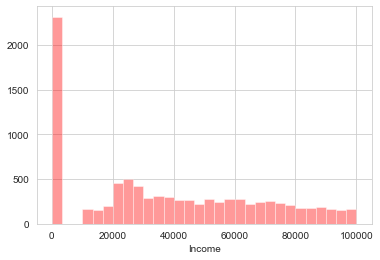

In [30]:
sns.set_style('whitegrid')
sns.distplot(numerical['Income'], kde = False, color ='red', bins = 30)

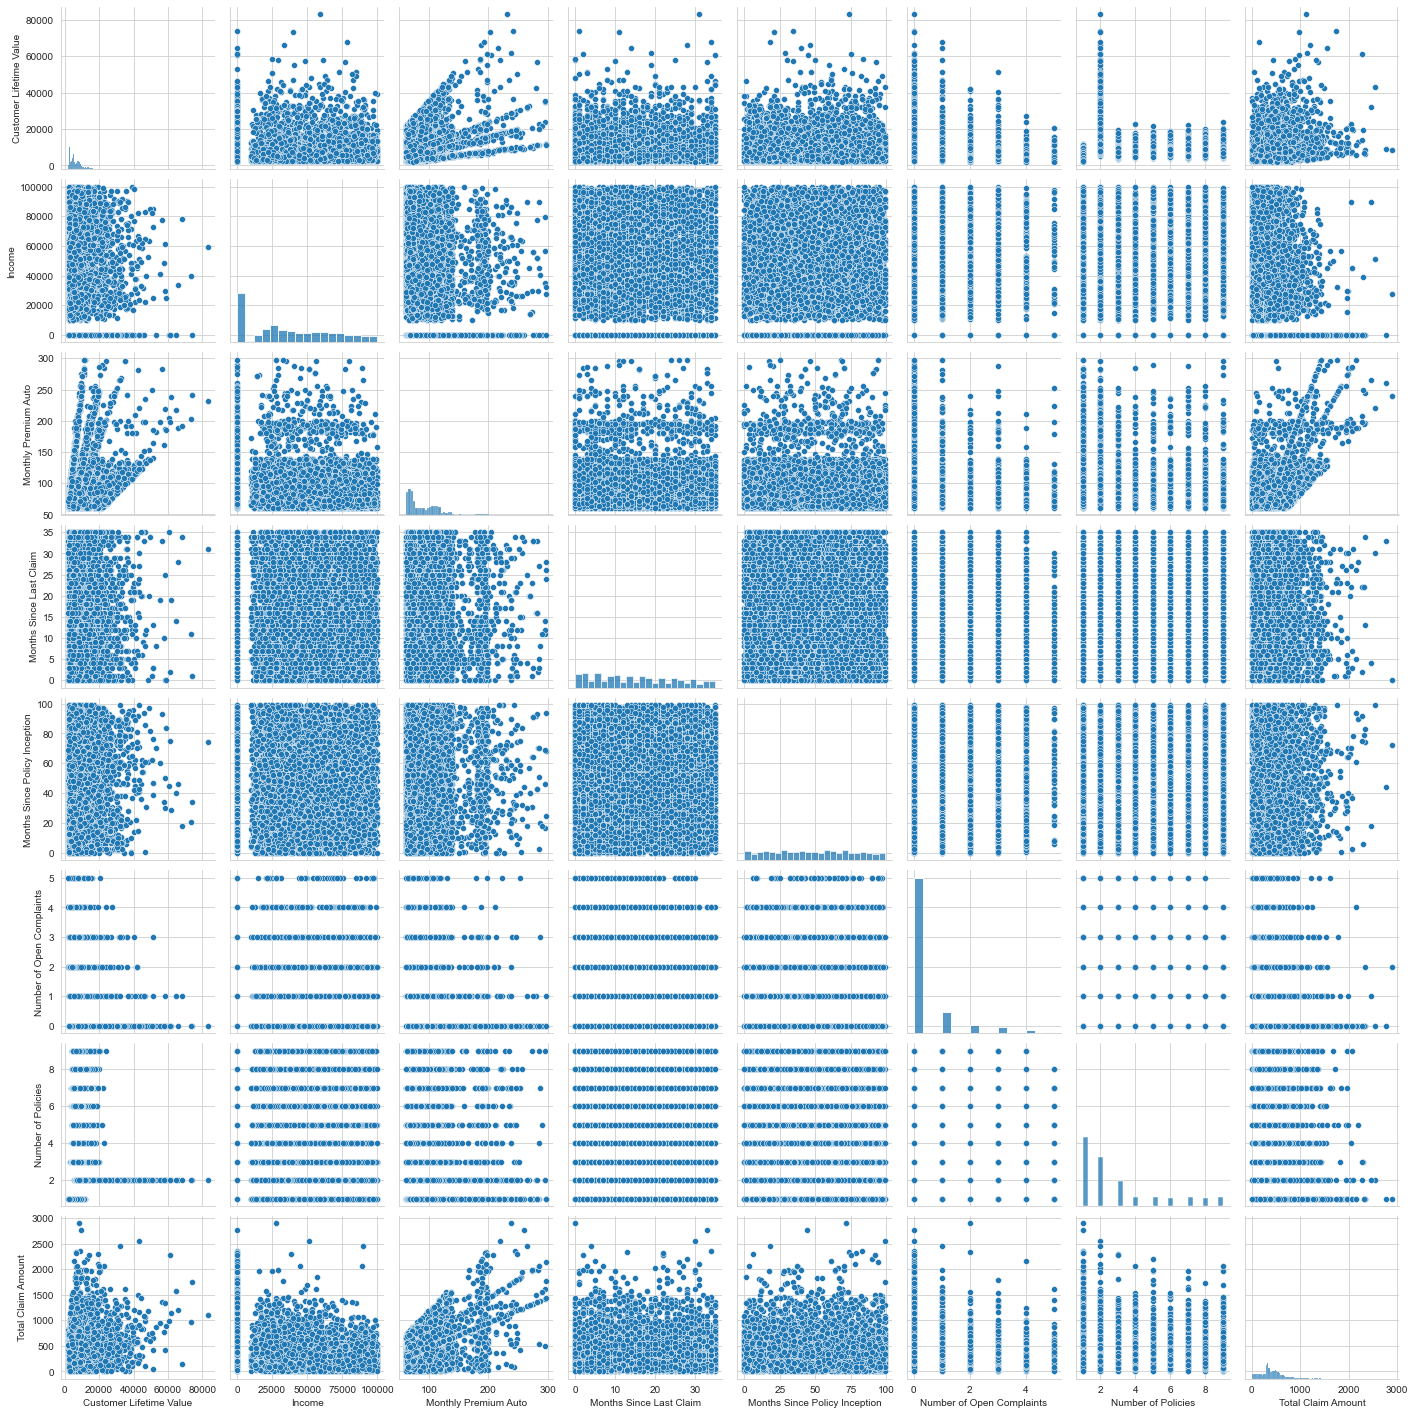

In [31]:
# use seabon to contruct numerical

sns.pairplot(numerical)
plt.show()

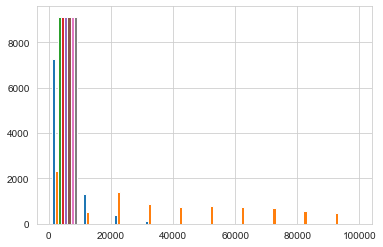

In [32]:
# Use Matplotlib to construct histograms

import matplotlib.pyplot as plt
plt.hist(numerical)
plt.show()

In [33]:
# use seabon to contruct numerical
categorical

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


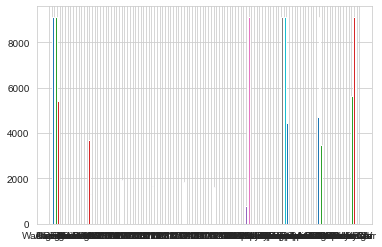

In [34]:
import matplotlib.pyplot as plt
plt.hist(categorical)
plt.show()

<AxesSubplot:>

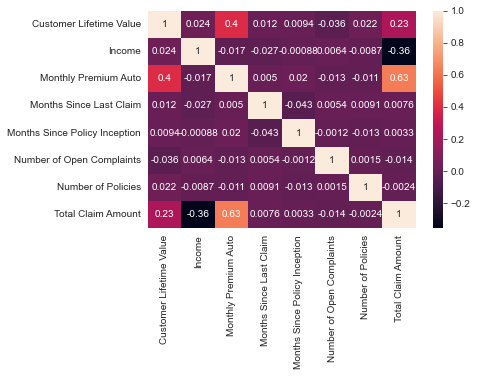

In [35]:
corelation=numerical.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns ,annot=True)

In [36]:
# # Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features 
# that have a high correlation, then do not drop any features

# No high correlation, no feature to be dropped

In [37]:
# Lab 5, Business Analysis

In [38]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


<AxesSubplot:>

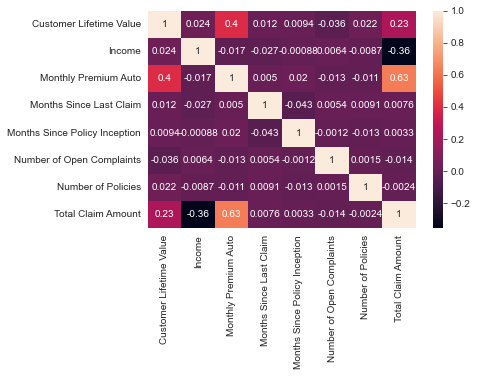

In [39]:
corelation=numerical.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns ,annot=True)

In [40]:
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [41]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


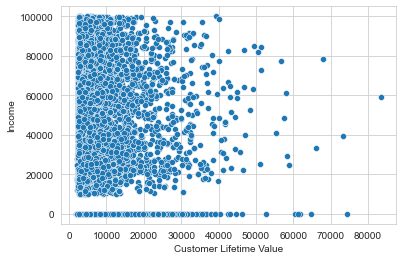

In [42]:
sns.scatterplot(x=numerical['Customer Lifetime Value'], y=numerical['Income'])
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

y =numerical['Total Claim Amount']
X=numerical.drop(['Total Claim Amount'], axis=1)

In [44]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Customer,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1
QZ44356,6979.535903,0,94,13,42,0,8
AI49188,12887.431650,48767,108,18,38,0,2
WW63253,7645.861827,0,106,18,65,0,7
HB64268,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2
PK87824,3096.511217,21604,79,14,28,0,1
TD14365,8163.890428,0,85,9,37,3,2


In [45]:
transformer = MinMaxScaler()
transformer.fit(X)
x_normalized = transformer.transform(X)
display(x_normalized)
#print(x_normalized.shape)
X_normalized_df=pd.DataFrame(x_normalized, columns=X.columns)

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

In [46]:
# Lab 6, Business Analysis

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 7)
(1827, 7)
(7307,)
(1827,)


In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# TIPS['Purchase count'] = pd.to_numeric(df['Purchase count'], errors='coerce')
# print(df.dtypes)

In [50]:
lm.fit(X_train, y_train)


LinearRegression()

In [51]:
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.5240307490697984

In [52]:
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.49412980334230094

In [53]:
y_pred_test

array([383.45130141, 371.62248468, 253.2725732 , ..., 388.74157976,
       403.576026  , 638.14922386])

In [54]:
from sklearn.metrics import mean_squared_error
# Comptuing the RMSE -> root mean squared error.
np.sqrt(mean_squared_error(y_test,y_pred_test))

200.55489480449495

In [55]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

200.55489480449495

In [56]:
from sklearn.metrics import mean_absolute_error, r2_score

In [75]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

145.34669060483122


In [58]:
# ASSIGHMENT 7.. IMPROVING MODEL BY CHANGING RANDOM

In [60]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

y1 =numerical['Total Claim Amount']
X1=numerical.drop(['Total Claim Amount'], axis=1)

In [61]:
X1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Customer,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1
QZ44356,6979.535903,0,94,13,42,0,8
AI49188,12887.431650,48767,108,18,38,0,2
WW63253,7645.861827,0,106,18,65,0,7
HB64268,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2
PK87824,3096.511217,21604,79,14,28,0,1
TD14365,8163.890428,0,85,9,37,3,2


In [62]:
transformer = MinMaxScaler()
transformer.fit(X1)
x1_normalized = transformer.transform(X1)
display(x1_normalized)
#print(x_normalized.shape)
X1_normalized_df=pd.DataFrame(x1_normalized, columns=X1.columns)

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

In [65]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_normalized_df, y1, test_size=0.2, random_state=20)

In [66]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(7307, 7)
(1827, 7)
(7307,)
(1827,)


In [68]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1_train, y1_train)

LinearRegression()

In [69]:
from sklearn.metrics import r2_score
y1_pred_train = lm.predict(X1_train)
r2_score(y1_train, y1_pred_train)

0.5178020542054416

In [70]:
y1_pred_test = lm.predict(X1_test)
r2_score(y_test, y_pred_test)

0.49412980334230094

In [71]:
y1_pred_test

array([397.98312697, 396.66589859, 542.66017846, ..., 382.03567579,
       353.02567215, 241.71624523])

In [72]:
from sklearn.metrics import mean_squared_error
# Comptuing the RMSE -> root mean squared error.
np.sqrt(mean_squared_error(y1_test,y1_pred_test))

203.7619851267609

In [74]:
rmse=np.sqrt(mean_squared_error(y1_test,y1_pred_test))
rmse

203.7619851267609

In [76]:
from sklearn.metrics import mean_absolute_error, r2_score

In [77]:
mae = mean_absolute_error(y1_test, y1_pred_test)
print(mae)

144.80231373798617
